In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
import scipy.io
sys.path.append("..")
import ODE_Dynamics as od
import Test_Likelihood as tl
import Positive_Symptom_fn as fn

In [2]:
data = scipy.io.loadmat('../data/test_data_simulation.mat')
x = tf.cast(data['data_simulation'],dtype = tf.float32)
test_data = np.reshape(
      x, x.shape)

In [3]:
test_data = tf.transpose(test_data)


In [4]:
vdyn_ode_fn = od.ViralDynamics

In [5]:
positive_fn = fn.proba_pos_sym(170306.4 * 1E-5).positive_fn
symptom_fn = fn.proba_pos_sym(170306.4 * 1E-5).symptom_fn

In [6]:
prob_s_ibar = 0.1

In [7]:
loglike = tl.loglik(test_data, vdyn_ode_fn, positive_fn, symptom_fn, prob_s_ibar, prob_fp=0.0, Epi_Model=od.SIR,
                 duration=8.0, Epi_cadence=0.5, Vir_cadence=0.0625)

In [8]:
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)
L = 0.0025/beta
V0 = np.random.normal(1E3, 1E2, 1)
print(V0)
X0 = 1E6
Y0 = V0
par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10, V0, X0, Y0]], dtype=np.float32))
vpar = par
pospar = par
sympar = par

[1200.29393302]


In [9]:
sample_size = 1000
k = 1
index = 1
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
L = 0.0025/beta

V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0

par=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0, V0, X0, Y0]])
init_state=(np.array([[V0,X0,Y0]], dtype=np.float32))

while index <= sample_size - 1:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
    par = np.concatenate((par, par_new), axis = 0)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0, V0, X0, Y0]])
    par = np.concatenate((par, par_new), axis = 0)
    init_state_new=(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_state = np.concatenate((init_state, init_state_new), 0)

    index +=1
        

vpar = tf.constant(par, dtype=tf.float32)
pospar = par
sympar = par
print(par.shape)

(1000, 6)


In [10]:
epipar = tf.constant(np.array([[1.8,  5.0E-08,0.1, 0.001,0.999]], dtype=np.float32))

In [11]:
ll,pp = loglike.__call__(test_data,epipar, vpar, pospar, sympar)

initial time
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(149.0, shape=(), dtype=float32)
lkjmnvlkjnfg
tf.Tensor(
[0.9979029  0.99772984 0.9975427  0.9973403  0.9971216  0.99688554
 0.99663097 0.9963565  0.99606067 0.99574196 0.9953986  0.99502856
 0.99462974 0.9941997  0.99373573 0.9932351  0.9926951  0.99211264
 0.99148464 0.990808   0.99007946 0.98929566 0.98845315 0.9875485
 0.98657817 0.98553854 0.9844261  0.9832372  0.9819683  0.98061585
 0.9791764  0.97764647 0.97602445 0.97431237 0.9725115  0.97062165
 0.9686417  0.96656966 0.96440345 0.9621411  0.95977956 0.957313
 0.9547378  0.9520534  0.94926274 0.94637144 0.9433883  0.94032484
 0.9371953  0.93401647 0.93080735 0.9275892  0.92438495 0.9212192
 0.91811794 0.9151081  0.91221714 0.9094731  0.90690416 0.9045379
 0.9024016  0.90051854 0.8989053  0.89757496 0.8965369  0.8957964
 0.8953548  0.89520854 0.89534974 0.8957689  0.89645714 0.89740336
 0.898594   0.9000133  0.901644   0.9034673  0.90546364 0.9076127
 0.90989393 0.912

In [12]:
C_xt = test_data[:,2]
N_xt = test_data[:,1]
pp_simu = C_xt/N_xt

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
plt.style.use('ggplot')
font = {'size'   : 9}
plt.rc('font', **font)

Text(0.5, 1, 'Test-positive probability likelihood function')

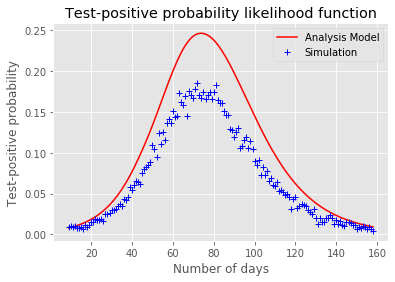

In [14]:
plt.plot(test_data[:,0], pp,"r-", label = "Analysis Model")
plt.plot(test_data[:,0], pp_simu, "b+", label = "Simulation")
plt.xlabel("Number of days")
plt.ylabel("Test-positive probability")
plt.legend(loc="upper right")
plt.savefig('simu_vs_code.pdf', dpi=300, bbox_inches='tight')
plt.title("Test-positive probability likelihood function")